In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
ticker = 'AAPL'  # Example: Apple Inc.
data = yf.download(ticker, start='2020-01-01', end='2023-01-01')
data.head()


[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2020-01-02 00:00:00+00:00,72.876114,75.087502,75.150002,73.797501,74.059998,135480400
2020-01-03 00:00:00+00:00,72.167587,74.357498,75.144997,74.125000,74.287498,146322800
2020-01-06 00:00:00+00:00,72.742645,74.949997,74.989998,73.187500,73.447502,118387200
2020-01-07 00:00:00+00:00,72.400551,74.597504,75.224998,74.370003,74.959999,108872000
2020-01-08 00:00:00+00:00,73.565186,75.797501,76.110001,74.290001,74.290001,132079200


In [3]:
def compute_rsi(data, window):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi


In [4]:
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['RSI'] = compute_rsi(data['Close'], 14)
data.dropna(inplace=True)
data.head()


Price,Adj Close,Close,High,Low,Open,Volume,SMA_20,SMA_50,RSI
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,,,
Date,,,,,,,,,
2020-03-13 00:00:00+00:00,67.605949,69.492500,69.980003,63.237499,66.222504,370732000,73.158374,76.45170,45.068568
2020-03-16 00:00:00+00:00,58.908653,60.552502,64.769997,60.000000,60.487499,322423600,72.124124,76.16100,40.052915
2020-03-17 00:00:00+00:00,61.498875,63.215000,64.402496,59.599998,61.877499,324056000,71.297374,75.93815,41.593070
2020-03-18 00:00:00+00:00,59.993382,61.667500,62.500000,59.279999,59.942501,300233600,70.335499,75.67250,43.998928
2020-03-19 00:00:00+00:00,59.533703,61.195000,63.209999,60.652500,61.847500,271857200,69.391499,75.40445,43.661286


In [5]:
data['Target'] = np.where(data['Close'].shift(-1) > data['Close'], 1, 0)
data.head()


Price,Adj Close,Close,High,Low,Open,Volume,SMA_20,SMA_50,RSI,Target
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,,,,
Date,,,,,,,,,,
2020-03-13 00:00:00+00:00,67.605949,69.492500,69.980003,63.237499,66.222504,370732000,73.158374,76.45170,45.068568,0
2020-03-16 00:00:00+00:00,58.908653,60.552502,64.769997,60.000000,60.487499,322423600,72.124124,76.16100,40.052915,1
2020-03-17 00:00:00+00:00,61.498875,63.215000,64.402496,59.599998,61.877499,324056000,71.297374,75.93815,41.593070,0
2020-03-18 00:00:00+00:00,59.993382,61.667500,62.500000,59.279999,59.942501,300233600,70.335499,75.67250,43.998928,0
2020-03-19 00:00:00+00:00,59.533703,61.195000,63.209999,60.652500,61.847500,271857200,69.391499,75.40445,43.661286,0


In [6]:
features = ['SMA_20', 'SMA_50', 'RSI']
X = data[features]
y = data['Target']
X.head(), y.head()


(Price                         SMA_20    SMA_50        RSI
 Ticker                                                   
 Date                                                     
 2020-03-13 00:00:00+00:00  73.158374  76.45170  45.068568
 2020-03-16 00:00:00+00:00  72.124124  76.16100  40.052915
 2020-03-17 00:00:00+00:00  71.297374  75.93815  41.593070
 2020-03-18 00:00:00+00:00  70.335499  75.67250  43.998928
 2020-03-19 00:00:00+00:00  69.391499  75.40445  43.661286,
 Date
 2020-03-13 00:00:00+00:00    0
 2020-03-16 00:00:00+00:00    1
 2020-03-17 00:00:00+00:00    0
 2020-03-18 00:00:00+00:00    0
 2020-03-19 00:00:00+00:00    0
 Name: Target, dtype: int64)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape


((565, 3), (142, 3))

In [8]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [9]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))


Accuracy: 0.44
              precision    recall  f1-score   support

           0       0.42      0.36      0.38        70
           1       0.45      0.51      0.48        72

    accuracy                           0.44       142
   macro avg       0.43      0.44      0.43       142
weighted avg       0.43      0.44      0.43       142



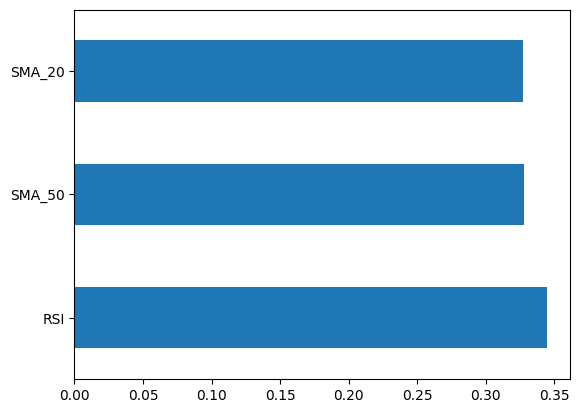

In [10]:
feature_importances = pd.Series(model.feature_importances_, index=features)
feature_importances.nlargest(10).plot(kind='barh')
plt.show()
